<a href="https://colab.research.google.com/github/Kanyarat-S/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'กัลยารัตน์ แสนสมบัติ'
ID = '6230205137'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:20


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3.773747,6.061187,-9.222883,-8.954075,6.305175,0.292267,7.613113,1.220585,7.528680,-0.619801,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330,-8.676474,5.676556,12.122375,30.382779
1,8.484404,-5.319557,-8.296086,-3.727046,3.417146,-2.354321,-3.198962,-5.068781,9.627884,-1.186137,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674,-0.839624,-4.623120,-10.639114,-21.115602
2,-0.885176,-2.064377,-1.735326,7.347219,2.895234,-6.591421,4.689732,-1.831760,5.527787,-2.187902,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886,9.889534,4.934751,-4.128754,26.673756
3,0.928953,-3.955223,-7.030693,9.744129,-0.342992,1.773401,-7.167229,4.207292,3.302174,3.398619,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097,-3.362707,4.125484,-7.910447,22.627419
4,-5.690987,-3.517787,-2.858825,-7.169143,-5.605544,-9.054258,6.521987,-0.913724,-7.339663,-9.462569,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939,-7.332672,5.696778,-7.035574,30.483889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.631343,-5.922440,-7.594832,-1.042551,3.699737,0.414187,-1.054134,-8.502152,8.658479,4.100714,7.837780,3.280779,-7.556245,7.024185,-1.320418,-9.951174,-0.452707,-5.646853,5.616549,-4.387339,-7.612117,9.434799,-7.439684,5.362935,5.604233,7.636980,-3.764263,-9.298095,-4.074592,-3.094425,-11.844880,-13.472124
9996,-9.164097,3.211174,-1.865883,-9.905384,-3.836890,7.568548,-5.732555,-7.434602,-5.328562,11.115293,2.945332,1.038299,0.860420,7.597590,-0.083376,4.711684,6.783715,8.115086,-7.911840,-3.839552,6.007630,-0.106223,-2.183768,3.416250,2.309178,-3.919674,4.573433,-5.643815,6.567515,-10.614089,6.422348,-51.070443
9997,-4.069899,-2.351560,-0.134604,-5.629799,-5.620890,-9.770339,6.168892,0.835266,-3.912655,-7.703638,1.361204,-3.658080,2.902530,-0.667720,7.789704,2.017346,1.698594,8.220736,4.792831,-8.864895,-8.932504,-0.911860,4.953654,-1.065717,-6.648004,-2.566931,-6.526202,-7.488712,-6.361973,5.717083,-4.703120,30.585414
9998,4.873270,-1.541458,-7.629112,2.557538,8.061374,9.162759,5.372126,1.288333,-8.305103,6.020796,3.953505,0.351103,4.409830,8.857026,-6.120125,-5.882252,-1.019697,-3.206716,-3.188903,4.414865,2.048225,-6.216080,0.629628,-5.189581,-8.773632,3.442669,10.901293,-8.050083,-2.491982,-5.548942,-3.082917,-25.744708


ทำการเตรียมข้อมูลก่อนจะนำข้อมูลไปใช้ โดยการตัดตัวที่มี correlation กันออกไป เพื่อลดข้อมูลที่เหมือนกันออกจาก Data

In [6]:
Data.shape #ดูขนาดของข้อมูล Data 

(10000, 32)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)

In [8]:
corr.shape #ดูขนาดของ corrcoef ของ Data

(32, 32)

In [9]:
corr

array([[ 1.        ,  0.01185574, -0.01839796, ...,  0.14290484,
         0.01185574,  0.14290484],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [-0.01839796,  0.20075925,  1.        , ..., -0.07158635,
         0.20075925, -0.07158635],
       ...,
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ]])

In [10]:
for i in range(corr.shape[0]): #ทำการวนลูปหาค่า correlation ที่ซ้ำกัน
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i}<=> column = {j} corrcoef = {corr[i,j]}') 


column = 1<=> column = 30 corrcoef = 1.0
column = 29<=> column = 31 corrcoef = 1.0
column = 30<=> column = 1 corrcoef = 1.0
column = 31<=> column = 29 corrcoef = 1.0


จากการวนลูปพบว่ามี correlation ที่ซ้ำกันและจะทำการตัดข้อมูลออก

In [11]:
newdata = Data.iloc[:,1:28]

In [12]:
newdata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,6.061187,-9.222883,-8.954075,6.305175,0.292267,7.613113,1.220585,7.528680,-0.619801,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330
1,-5.319557,-8.296086,-3.727046,3.417146,-2.354321,-3.198962,-5.068781,9.627884,-1.186137,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674
2,-2.064377,-1.735326,7.347219,2.895234,-6.591421,4.689732,-1.831760,5.527787,-2.187902,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886
3,-3.955223,-7.030693,9.744129,-0.342992,1.773401,-7.167229,4.207292,3.302174,3.398619,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097
4,-3.517787,-2.858825,-7.169143,-5.605544,-9.054258,6.521987,-0.913724,-7.339663,-9.462569,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.922440,-7.594832,-1.042551,3.699737,0.414187,-1.054134,-8.502152,8.658479,4.100714,7.837780,3.280779,-7.556245,7.024185,-1.320418,-9.951174,-0.452707,-5.646853,5.616549,-4.387339,-7.612117,9.434799,-7.439684,5.362935,5.604233,7.636980,-3.764263,-9.298095
9996,3.211174,-1.865883,-9.905384,-3.836890,7.568548,-5.732555,-7.434602,-5.328562,11.115293,2.945332,1.038299,0.860420,7.597590,-0.083376,4.711684,6.783715,8.115086,-7.911840,-3.839552,6.007630,-0.106223,-2.183768,3.416250,2.309178,-3.919674,4.573433,-5.643815
9997,-2.351560,-0.134604,-5.629799,-5.620890,-9.770339,6.168892,0.835266,-3.912655,-7.703638,1.361204,-3.658080,2.902530,-0.667720,7.789704,2.017346,1.698594,8.220736,4.792831,-8.864895,-8.932504,-0.911860,4.953654,-1.065717,-6.648004,-2.566931,-6.526202,-7.488712
9998,-1.541458,-7.629112,2.557538,8.061374,9.162759,5.372126,1.288333,-8.305103,6.020796,3.953505,0.351103,4.409830,8.857026,-6.120125,-5.882252,-1.019697,-3.206716,-3.188903,4.414865,2.048225,-6.216080,0.629628,-5.189581,-8.773632,3.442669,10.901293,-8.050083


จากทำการเลือกใช้ข้อมูลที่ไม่มี correlation = 1 จากตาราง Data ไม่สามารถเอาคอลัมน์ออกได้ จึงทำแบบนี้

##ข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

###Import

In [13]:
from sklearn.cluster import  KMeans #นำข้อมูลเข้า

###Define

In [14]:
kmeans = KMeans(random_state=2021) #เป็นคำสั่งของการกำหนดค่า K แต่ค่า K ที่เป็น Default เรายังไม่กำหนด

##Fit- transform

####คำนวณหาจุด cluter centers ของข้อมูล newdata ด้วยวิธี K-means clustering

In [15]:
kmeans.fit(Data)##คำนวณหาจุด cluter centers ของข้อมูล newdata ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

###ทดสอบการจัดกลุ่มของ Data

In [16]:
y = kmeans.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y 
y

array([7, 0, 5, ..., 1, 4, 5], dtype=int32)

## PCA 

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(newdata)

In [18]:
from matplotlib import pyplot as plt

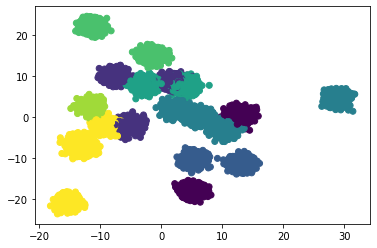

In [19]:
kmeans = KMeans(random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

##ดูว่าค่า K ควรเป็นเท่าไหร่

##Elbow Method

###SSE

In [20]:
kmeans.inertia_  #ทำการคำนวณค่า SSE ของ data

4583065.72952163

In [21]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [22]:
SSE

[21043525.2946053,
 12533065.08609684,
 10989012.264080929,
 9863756.63160429,
 9019631.747012235,
 8248184.2299705325,
 7377188.501246718,
 6571670.621149184]

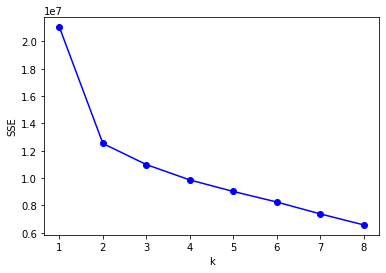

In [23]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') #นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 8 กลุ่ม จากกราฟจะเห็นว่าเริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้กัน และจากกราฟจะเห็นได้ว่าค่า K  มีการเปลี่ยนแปลงของข้อมูลทำให้เราทราบว่ากราฟดังกล่าวมีค่า K = 8

##หาค่า k ด้วยวิธี " The silhouette coefficient "

In [24]:
from sklearn import metrics #นำimport metrics มาใช้

In [25]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

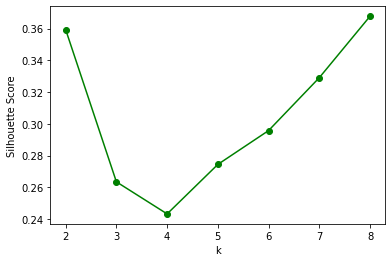

In [26]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟจะบอกได้ว่า k แบ่งออกได้ 8 กลุ่ม 

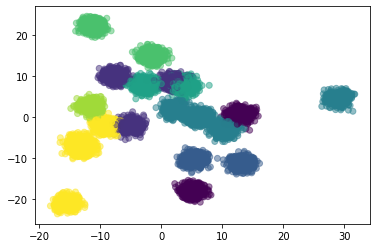

In [27]:
kmeans = KMeans(n_clusters = 8,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

จากกราฟจะเห้นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 8 กลุ่มแล้ว จะมีข้อมูลบางจำนวนที่ทับซ้อนกัน และเห็นได้อีกว่าข้อมูลชุดนี้ปริมาณที่มาก

##ข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

##ลดจำนวน Dimension ของข้อมูล

#ทำMDS

In [28]:
from sklearn.manifold import MDS

In [29]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [30]:
new_mds = mds.fit_transform(Data) #ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด

In [31]:
kmeans2 = KMeans(n_clusters = 8,random_state=2021) #กำหนดกลุ่ม k = 8
kmeans2.fit(Data)
q = kmeans2.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น q

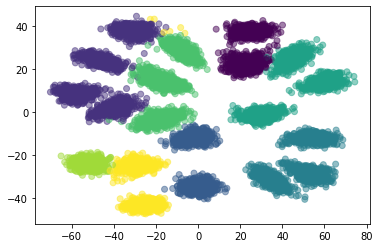

In [32]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=q,alpha=0.5)

จากกราฟที่ได้ พบว่าเมื่อแบ่งกลุ่มของ Data เป็น 8 กลุ่ม

##ข้อ 4 เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

##กราฟ ข้อ 2

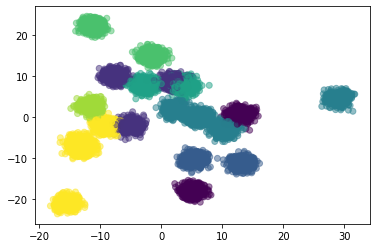

In [33]:
kmeans = KMeans(n_clusters = 8,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

##กราฟ ข้อ 3

Text(0.5, 1.0, 'DataGenerator')

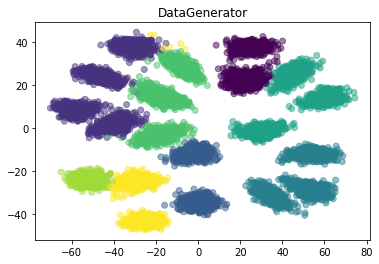

In [34]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=q,alpha=0.5)
plt.title('DataGenerator')

จากการทำกราฟ ข้อ 2 กับ ข้อ 3 มีการกระจายข้อมูลที่แตกต่างกัน

จากกราฟข้อ 2 มีการจัดกลุ่ม clustering และทำการลดจำนวน Dimension ของข้อมูล โดยการทำ PCA ในการลด Dimension โดยจุดของข้อมุลจะอยู่ที่เดิม

จากกราฟข้อ 3 ได้ทำการ clustering ซึ่งทำการลด Dimention ด้วยวิธี MDS โดยทุกๆจุดของข้อมูลจะยึดจุดตั้งต้นที่กำหนดเป็นหลัก จึงทำให้แตกต่างกัน จากนั้นผลลัพธ์ออกมาจึงไม่เหมือนกัน